# Modeling

## Fit the Model

In [86]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [10]:
expected_model_version = '1.0'
model_path = './models/4months_A_pv.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
else:
    print("Expected model not found")

In [11]:
#Load Data
#Data Loading
df = pd.read_pickle('./pkl_files/df_10.pkl')

In [12]:
Power = df["Power DC [W]"]

In [15]:
X = df[model.X_columns]
y = df['Power DC [W]']

In [16]:
len(X), len(y)

(125677, 125677)

In [17]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=1530, n_jobs=-1,
                                       random_state=47))])

In [19]:
#cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

In [20]:
#cv_results['test_score']

In [21]:
#mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
#mae_mean, mae_std

## Now we study the predictions

In [25]:
power_pred = model.predict(X)

In [29]:
len(power_pred)

125677

In [30]:
len(y)

125677

In [56]:
df['df'] = df.index

In [58]:
s = pd.DataFrame(power_pred)

In [62]:
s['dt'] = df.index

In [67]:
s.columns = ['pred','dt']

In [68]:
s.head()

,pred,dt
0,1.650972,2014-01-01 07:40:00+00:00
1,1.030222,2014-01-01 07:40:00+00:00
2,4.951644,2014-01-01 07:50:00+00:00
3,5.848828,2014-01-01 07:50:00+00:00
4,19.303454,2014-01-01 08:00:00+00:00


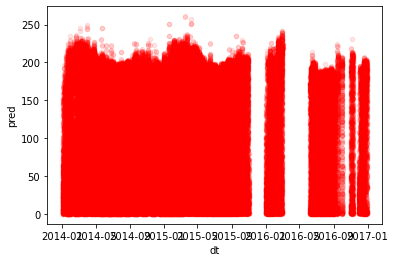

In [92]:
s.plot(kind = 'scatter', x = 'dt', y = 'pred',color='r',alpha=0.1)

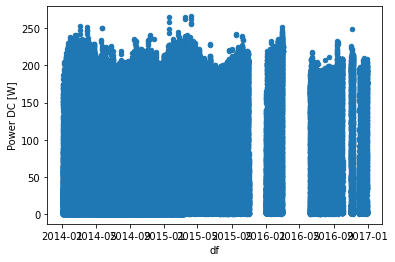

In [81]:
df.plot(kind='scatter',x='df', y = "Power DC [W]")

In [87]:
mean_absolute_error(df["Power DC [W]"], s['pred'])

2.6133461363039725

In [88]:
mean_squared_error(df["Power DC [W]"], s['pred'])

19.677797602722627

In [89]:
r2_score(df["Power DC [W]"], s['pred'])

0.9960813372508325